In [1]:
#load package
.libPaths(c("/cluster/home/liuhengxin/software/miniconda3_2/envs/r-kernel/lib/R/library",
           "/cluster/home/liuhengxin/software/miniconda3/envs/r4.1.2/lib/R/library",
           "/cluster/home/liuhengxin/software/miniconda3_2/envs/Rsplot/lib/R/library"))
library(data.table)
library(qs)
library(GenomicRanges)
library(GenomicFeatures)
library(rtracklayer)
library(dplyr)
library(ggbio)
library(reshape2)
library(ggsci)
library(viridis)
library(ggpubr)
library(ggh4x)
library(ggtranscript)
library(khroma)
library(bambu)
setwd("/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/")
MySplit = function(str,sep, n){
  return(unlist(lapply(strsplit(str,sep),"[[",n)))
}

qs 0.25.5

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:data.table’:

    first, second


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: I

In [36]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /cluster/home/liuhengxin/software/miniconda3_2/envs/r-kernel/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Asia/Shanghai
tzcode source: system (glibc)

attached base packages:
[1] grid      stats4    stats     graphics  grDevices datasets  utils    
[8] methods   base     

other attached packages:
 [1] VennDiagram_1.7.3           futile.logger_1.4.3        
 [3] bambu_3.4.0                 BSgenome_1.70.1            
 [5] BiocIO_1.12.0               Biostrings_2.70.1

In [2]:
# dir.create("data/fullscope_qc")
setwd("/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/")

In [2]:
setwd("/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/")
#fsraw.cor = qread("data/reads_full_anotation/main_data_read_total_annotation_delete_multiread_24_09_04.qs")
setwd("/cluster/home/liuhengxin/P1_brain_nanopore/")
MySplit = function(str,sep, n){
  return(unlist(lapply(strsplit(str,sep),"[[",n)))
}
cellan = read.csv("ref/T44/cell_type_type20230220-macaque1-contour2_v1.csv")
cellan = unique(cellan[,c("subclass","class")])
areaan = read.csv("ref/area_annotation.csv")
gtf = rtracklayer::import("ref/bambu_extended_annotations_novelname.gtf")
areaan = unique(areaan[c("L0","L3")])
colnames(areaan) = c("lobe","area")
areaan[areaan$area == "1/2",]$area = "1|2"
setwd("/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/")

In [6]:
fsraw = qread("data/reads_full_anotation/main_data_read_total_annotation_24_09_04.qs")
head(fsraw)

readid,origin_name,cell_id,cell_type_id,subclass,class,transcript_id,gene_id,x,y,layer,region,lobe,subcortical,readcount
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
00000033-e8ce-4144-8ded-93a772582329-14;st_ed:A:10616-11399;AD:A:adapterJ-adapterK;AP:A:Correct_739-763:+,L-lv-v,NA,NA,,,XM_005540610.2,NUCKS1,19690,62662,v,lv,NA,Ventricle,9933
00000033-e8ce-4144-8ded-93a772582329-3;st_ed:A:1542-1993;AD:A:adapterD-adapterE;AP:A:Correct_413-432:+,L-cb-cb,NA,NA,,,XM_005581643.2,MLLT3,7970,88627,cb,cb,NA,Cerebellum,1966
00000033-e8ce-4144-8ded-93a772582329-3;st_ed:A:1542-1993;AD:A:adapterD-adapterE;AP:A:Correct_413-432:+,L-cb-cb,NA,NA,,,XM_005581643.2,MLLT3,7970,88627,cb,cb,NA,Cerebellum,1966
00000033-e8ce-4144-8ded-93a772582329-3;st_ed:A:1542-1993;AD:A:adapterD-adapterE;AP:A:Correct_413-432:+,L-cb-cb,NA,NA,,,XM_005581643.2,MLLT3,7970,88627,cb,cb,NA,Cerebellum,1966
00000036-9da5-46f6-80c5-a6a0bee7474f-2;st_ed:A:646-1552;AD:A:adapterC-adapterD;AP:A:Correct_863-887:+,L-TEpv-l4,NA,NA,,,GPX4-WeiLab-1,GPX4,37772,84660,l4,TEpv,temporal,Cortex,6884
0000009e-f52a-4eb5-97dd-4ad22c3acd50-4;st_ed:A:1918-2609;AD:A:adapterL-adapterN;AP:A:Jump|AD:A:no-split|ts-te:103-320,L-1|2-l5,996777,77,L4/5,GLU,XM_005582166.2,STXBP1,14185,29617,l5,1|2,somatosensory,Cortex,56275


In [7]:
#length(unique(fsraw[fsraw$subcortical != "Cortex",]$cell_id))
cellid = unique(fsraw[fsraw$subcortical != "Cortex",]$cell_id)

[1] 8

In [4]:
ngscount = qread("/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/data/reads_full_anotation/ngs_readid_total_stat_24_05_27.qs")
head(ngscount)

readid,origin_name,cell_id,cell_type_id,subclass,class,transcript_id,gene_id,x,y,layer,region,lobe,subcortical,readcount
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
00000033-e8ce-4144-8ded-93a772582329-14;st_ed:A:10616-11399;AD:A:adapterJ-adapterK;AP:A:Correct_739-763:+,L-lv-v,NA,NA,,,XM_005540610.2,NUCKS1,19690,62662,v,lv,NA,Ventricle,9933
00000033-e8ce-4144-8ded-93a772582329-3;st_ed:A:1542-1993;AD:A:adapterD-adapterE;AP:A:Correct_413-432:+,L-cb-cb,NA,NA,,,XM_005581643.2,MLLT3,7970,88627,cb,cb,NA,Cerebellum,1966
00000033-e8ce-4144-8ded-93a772582329-3;st_ed:A:1542-1993;AD:A:adapterD-adapterE;AP:A:Correct_413-432:+,L-cb-cb,NA,NA,,,XM_005581643.2,MLLT3,7970,88627,cb,cb,NA,Cerebellum,1966
00000033-e8ce-4144-8ded-93a772582329-3;st_ed:A:1542-1993;AD:A:adapterD-adapterE;AP:A:Correct_413-432:+,L-cb-cb,NA,NA,,,XM_005581643.2,MLLT3,7970,88627,cb,cb,NA,Cerebellum,1966
00000036-9da5-46f6-80c5-a6a0bee7474f-2;st_ed:A:646-1552;AD:A:adapterC-adapterD;AP:A:Correct_863-887:+,L-TEpv-l4,NA,NA,,,GPX4-WeiLab-1,GPX4,37772,84660,l4,TEpv,temporal,Cortex,6884
0000009e-f52a-4eb5-97dd-4ad22c3acd50-4;st_ed:A:1918-2609;AD:A:adapterL-adapterN;AP:A:Jump|AD:A:no-split|ts-te:103-320,L-1|2-l5,996777,77,L4/5,GLU,XM_005582166.2,STXBP1,14185,29617,l5,1|2,somatosensory,Cortex,56275


CID,umi_count
<chr>,<int>
0_100022,1
0_100037,1
0_100040,1
0_100060,3
0_100080,2
0_100085,1


### Calculate reference length

In [4]:
rldf = fread("/cluster/home/hongyanhong/projects/MASseq-review/alignments/allwidth_new.tsv",sep = "\t")
head(rldf)

width,sample
<int>,<chr>
126,Luyi Tian_2021_sclr
126,Luyi Tian_2021_sclr
145,Luyi Tian_2021_sclr
125,Luyi Tian_2021_sclr
126,Luyi Tian_2021_sclr
124,Luyi Tian_2021_sclr


In [9]:
unique(rldf$sample)
rldf$log = log10(rldf$width)

[1] "Luyi Tian_2021_sclr"         "nbt_tilgner"                
[3] "Careen Foord_2025_spatiallr" "tilgner_cellreport"         
[5] "directONT"                   "fullscopeONT"               
[7] "fullscopePacbio"             "fullscopeCyclone"

In [30]:
rldf %>% group_by(sample) %>% summarise(mean(width), median(width))

sample,mean(width),median(width)
<chr>,<dbl>,<dbl>
Careen Foord_2025_spatiallr,653.6862,560
Luyi Tian_2021_sclr,646.5901,138
directONT,772.4185,640
fullscopeCyclone,476.5377,419
fullscopeONT,491.2545,430
fullscopePacbio,496.8819,436
nbt_tilgner,856.4398,725
tilgner_cellreport,565.6232,522


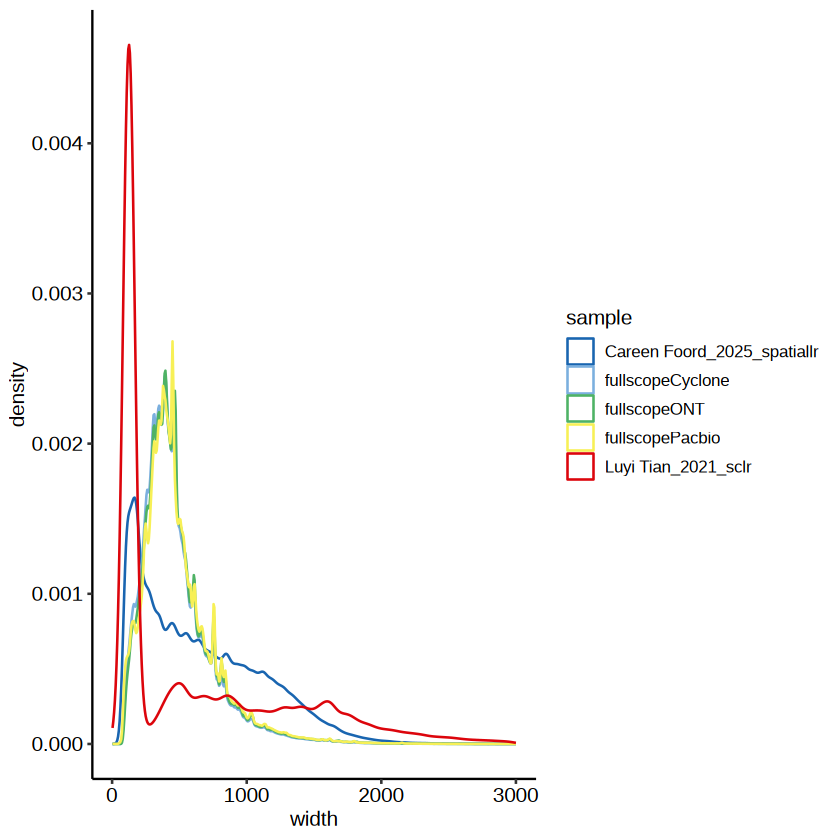

In [32]:
# rldf.hub = rldf[rldf$sample %in% c(""),]
p1 = ggplot(rldf[rldf$sample %in% c("Careen Foord_2025_spatiallr","Luyi Tian_2021_sclr",
                                   "fullscopeONT","fullscopePacbio","fullscopeCyclone")&
                 rldf$width <= 3000,],
                aes(x = width,color = sample)) + 
                geom_density() + theme_pubr() + scale_color_discreterainbow() +
                theme(legend.position = "right")
p1

In [7]:
ejdf = qread("/cluster/home/hongyanhong/projects/MASseq-review/junctioncount_260105.qs")
head(ejdf)

junctioncount2,sample,readcount,readratio
<fct>,<chr>,<int>,<dbl>
0,Careen Foord_2025_spatiallr,10714,0.021428000
0,Direct ONT,19099,0.038198000
0,fullscope,23119,0.046238000
0,Luyi Tian_2021_sclr,53104,0.124834859
0,Natan_tilgner_singlenucleus,11065,0.008688183
0,nbt_tilgner,15005,0.030010000


In [14]:
unique(ejdf$sample)

[1] "Careen Foord_2025_spatiallr" "Direct ONT"                 
[3] "fullscope"                   "Luyi Tian_2021_sclr"        
[5] "Natan_tilgner_singlenucleus" "nbt_tilgner"

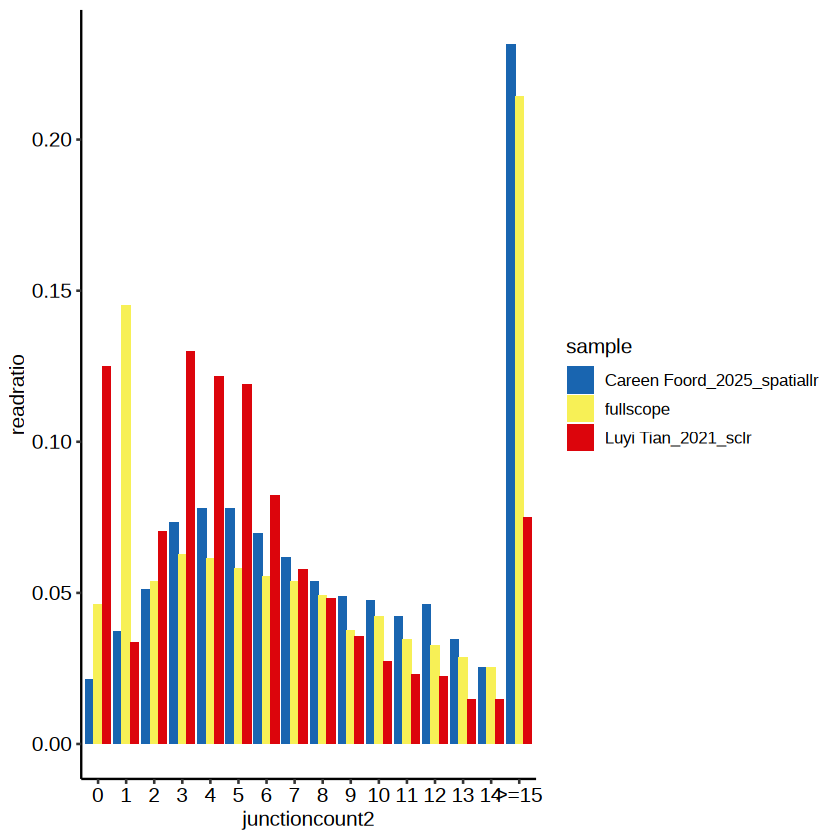

In [19]:
p2 = ggplot(ejdf[ejdf$sample %in% c("Careen Foord_2025_spatiallr","Luyi Tian_2021_sclr","fullscope"),],
                aes(x = junctioncount2,y = readratio,fill = sample)) + 
                geom_bar(stat = "identity",position = "dodge") + theme_pubr() + scale_fill_discreterainbow() +
                theme(legend.position = "right")
p2

In [33]:
ggexport(p1,filename = "result/figure_revision/read_length_compare_ref_26_01_06.pdf",
         width = 5,height = 4)
ggexport(p2,filename = "result/figure_revision/exon_junction_compare_ref_26_01_06.pdf",
         width = 5,height = 4)

file saved to result/figure_revision/read_length_compare_ref_26_01_06.pdf

file saved to result/figure_revision/exon_junction_compare_ref_26_01_06.pdf



In [20]:
pt = ggarrange(p1,p2,common.legend = T)
pt
# ggexport(pt,filename = "")

In [22]:
library(VennDiagram)

Loading required package: grid


Attaching package: 'grid'


The following object is masked from 'package:Biostrings':

    pattern


Loading required package: futile.logger

Warning message:
"package 'futile.logger' was built under R version 4.3.3"

Attaching package: 'VennDiagram'


The following object is masked from 'package:ggpubr':

    rotate




In [34]:
cmpdf = qread("/cluster/home/hongyanhong/projects/MASseq-review/newdatadf.qs")
head(cmpdf)

,width,sample
,<dbl>,<chr>
1,1880,fullscope1
2,177,fullscope1
3,125,fullscope1
4,1703,fullscope1
5,1347,fullscope1
6,654,fullscope1


In [35]:
cmpdf %>% group_by(sample) %>% summarise(mean(width))

sample,mean(width)
<chr>,<dbl>
directONT1,485.1430
directONT2,554.7419
directONT3,527.1393
fullscope1,544.6334
fullscope2,544.6334
fullscope3,542.4940


### Stat reference MG ratio

In [4]:
cellan = read.csv("../ref/T44/cell_type_type20230220-macaque1-contour2_v1.csv")
head(cellan)

,cell_type_id,cell_type,subclass,class,cell_type_color
,<int>,<chr>,<chr>,<chr>,<chr>
1,1,GLU L2.1 FSHB/ANKUB1,L2,GLU,#FF8247
2,2,GLU L2.2 ITGA4/CHST9,L2,GLU,#FF8247
3,3,GLU L2.3 ART3/GPC5,L2,GLU,#FF8247
4,4,GLU L2.4 CARTPT/MEPE,L2,GLU,#FF8247
5,5,GLU L2.5 ADAMTS12/GIPC2,L2,GLU,#FF8247
6,6,GLU L2.6 PDGFD/CCBE1,L2,GLU,#FF8247


In [12]:
length(filels)

[1] 119

In [7]:
filels = list.files("/cluster/home/liuhengxin/P1_brain_nanopore/ref/20221110-macaque1-contour2/",full.names = T)
refcl = NULL
for(i in 1:length(filels)){
    refcli = read.csv(filels[i],header = T)
    refcli$group = i
    refcl = rbind(refcl,refcli)
}
table(refcl$group)
head(refcl)


     1      2      3      4      5      6      7      8      9     10     11 
313409 130054 205015 239822 422959 187673 326766 176331 342118 207499 484030 
    12     13     14     15     16     17     18     19     20     21     22 
194334 482582 183287 447756 228593 432758 185686 483749 197516 393285 152577 
    23     24     25     26     27     28     29     30     31     32     33 
377704 182196 455355 136735  32249 126383 117096 129129  95986 155986 227892 
    34     35     36     37     38     39     40     41     42     43     44 
104314 259891 114925 134764 114145  96783  98494  96427 123263  73768  97904 
    45     46     47     48     49     50     51     52     53     54     55 
 82340  37755  50200  53612  42096  17599 387058 276546 198665 317822 398593 
    56     57     58     59     60     61     62     63     64     65     66 
382134 393147 393709 401075 460086 242304 270012 378615 323697 222654 411103 
    67     68     69     70     71     72     73     74     75 

,no,cell_id,cell_type_id,group
,<int>,<dbl>,<int>,<int>
1,1,1,64,1
2,2,3,120,1
3,3,5,2,1
4,4,12,19,1
5,5,14,63,1
6,6,16,3,1


In [8]:
refcl.st = refcl %>% group_by(group,cell_type_id) %>% summarise(celln = length(unique(cell_id)))
nrow(refcl.st)
refcl.st = merge(refcl.st,cellan,by = "cell_type_id")
nrow(refcl.st)
refcl.st2 = refcl.st %>% group_by(group) %>% mutate(cellnt = sum(celln)) %>%
                group_by(group,subclass) %>% summarise(celln = sum(celln),cellp = celln/cellnt[1])
head(refcl.st2)

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.


[1] 26386

[1] 26386

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.


group,subclass,celln,cellp
<int>,<chr>,<int>,<dbl>
1,ASC,13947,4.450096e-02
1,EC,1,3.190719e-06
1,L2,20662,6.592663e-02
1,L2/3,43249,1.379954e-01
1,L2/3/4,10012,3.194548e-02
1,L3/4,34192,1.090971e-01


In [11]:
summary(refcl.st2[refcl.st2$subclass == "MG",]$cellp*100)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0002196 0.0208762 0.1994748 0.3114001 0.4262323 1.8691780 

### Calculate isoform detect sensitive

In [3]:
gtfinfo = qread("ref/bambu_extended_annotations_transinfo.qs")
names(gtfinfo)

[1] "transinfo"     "transinfo_hub"

In [5]:
gtfinfo = qread("ref/bambu_extended_annotations_transinfo_filter_24_05_01.qs")
head(gtfinfo)

,TXNAME,GENEID,NDR,novelGene,novelTranscript,txClassDescription,readCount,relReadCount,relSubsetCount,txid,eqClassById,fullLengthCounts
,<chr>,<chr>,<dbl>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<list>,<dbl>
BambuTx11,BambuTx11,BambuGene6274,0.5074496,TRUE,TRUE,newGene-spliced,71,0.8352941,0.8352941,11,"11, 4250....",40.14176
BambuTx12,BambuTx12,BambuGene6293,0.6035481,TRUE,TRUE,newGene-spliced,39,1.0000000,1.0000000,12,12,42.00000
BambuTx24,BambuTx24,BambuGene53,0.7333873,TRUE,TRUE,newGene-spliced,31,1.0000000,1.0000000,24,24,33.00000
BambuTx31,BambuTx31,BambuGene6352,0.4392864,TRUE,TRUE,newGene-spliced,401,0.9457547,0.9457547,31,"31, 42588",393.88151
BambuTx33,BambuTx33,BambuGene6357,0.6670452,TRUE,TRUE,newGene-spliced,193,1.0000000,1.0000000,33,33,193.00000
BambuTx34,BambuTx34,BambuGene92,0.6288726,TRUE,TRUE,newGene-spliced,131,1.0000000,1.0000000,34,34,133.00000


In [8]:
nrow(gtfinfo[gtfinfo$fullLengthCounts == 0,])
nrow(gtfinfo[gtfinfo$readCount == 0,])

[1] 46332

[1] 56375

In [9]:
isosigls = qread(file = "data/dtu_analysis/dtu_isoform_ls_fsraw_cor_24_09_04.qs")
length(unique(isosigls$layer$transcript_id))

[1] 17470

### Cell and Metacell stat

In [25]:
cellanuq = qread("ref/cellball_annotation_n10_24_10_24.qs")
cellanuq = cellanuq %>% group_by(cell_id) %>% filter(n() == 1)
cellanuq = cellanuq[cellanuq$layer %in% paste0("l",1:6),]
cellanuq = cellanuq[cellanuq$cellnum > 3,]
nrow(cellanuq)

[1] 380986

In [26]:
cellanuq.st = cellanuq %>% group_by(metacell,class,subclass) %>% summarise(maxdist = mean(dist(data.frame(x,y))))
cellanuq.st

`summarise()` has grouped output by 'metacell', 'class'. You can override using
the `.groups` argument.


metacell,class,subclass,maxdist
<chr>,<chr>,<chr>,<dbl>
GABA-LAMP5-l1-1|2-1,GABA,LAMP5,4593.3275
GABA-LAMP5-l1-1|2-2,GABA,LAMP5,3035.7352
GABA-LAMP5-l1-23a-1,GABA,LAMP5,2920.0544
GABA-LAMP5-l1-30-1,GABA,LAMP5,999.9553
GABA-LAMP5-l1-7op-1,GABA,LAMP5,5160.1697
GABA-LAMP5-l1-CPB-1,GABA,LAMP5,2336.5974
GABA-LAMP5-l1-FST-1,GABA,LAMP5,2054.5470
GABA-LAMP5-l1-FST-2,GABA,LAMP5,3363.9053
GABA-LAMP5-l1-PEa-1,GABA,LAMP5,6437.1385


In [28]:
mean(cellanuq.st$maxdist)

[1] 422.5677

file saved to result/figure_revision/MetaCell_distance_stat_25_09_09.pdf



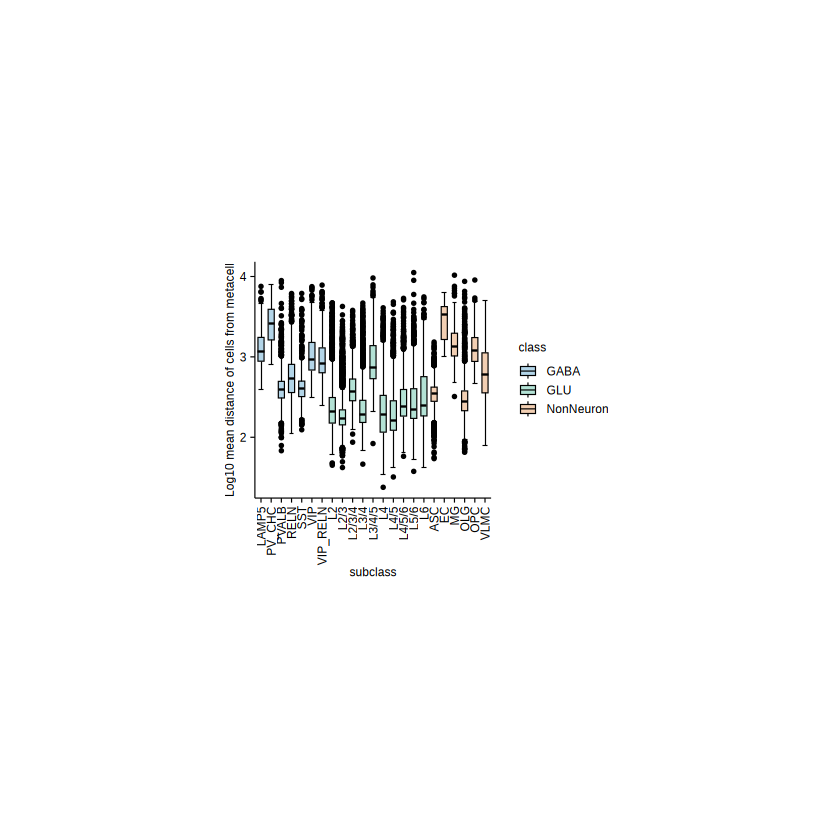

In [24]:
#ggplot(cellanuq.st,aes(x = subclass,y = maxdist)) + geom_boxplot()
library(tidyplots)
cellanuq.st$meandist = log10(cellanuq.st$maxdist)
cellanuq.st = cellanuq.st[order(cellanuq.st$class,cellanuq.st$subclass),]
cellanuq.st$subclass = factor(cellanuq.st$subclass,levels = unique(cellanuq.st$subclass))
p1.1 = cellanuq.st |> 
  tidyplot(x = subclass, y = meandist, color = class) |> 
  add_boxplot(color = "black")  |> adjust_x_axis(rotate_labels = 90) |> adjust_y_axis(title = "Log10 mean distance of cells from metacell")
p1.1
ggexport(p1.1,filename = "result/figure_revision/MetaCell_distance_stat_25_09_09.pdf",width = 5,height = 4)

file saved to result/figure_revision/MetaCell_cellnumber_stat_25_09_09.pdf



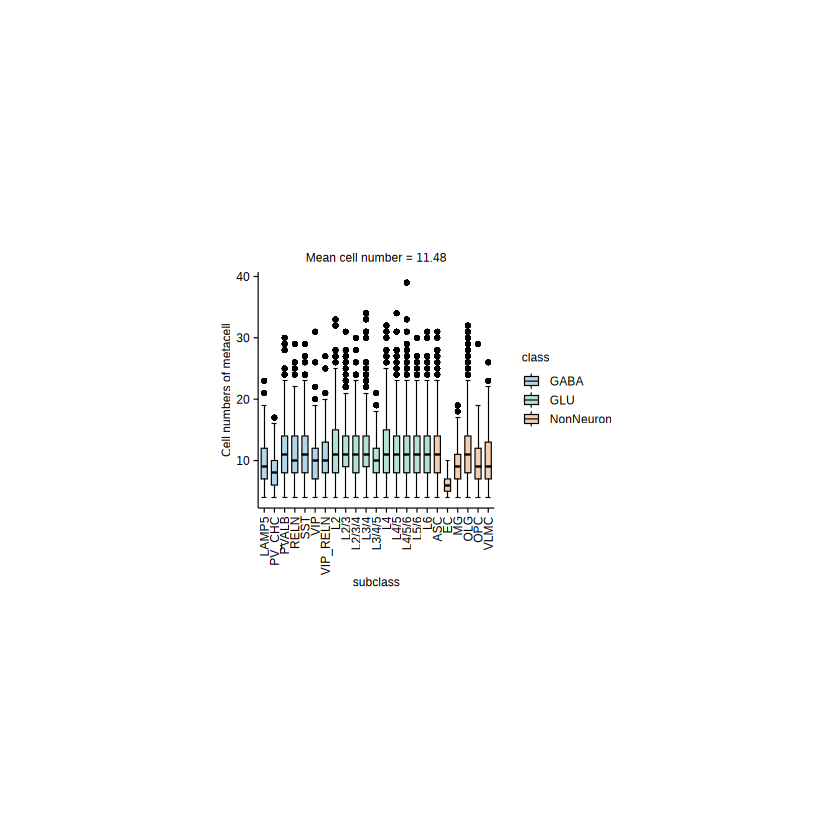

In [26]:
cellanuq = cellanuq[order(cellanuq$class,cellanuq$subclass),]
cellanuq$subclass = factor(cellanuq$subclass,levels = unique(cellanuq$subclass))
#mean(cellanuq$cellnum)
p1.2 = cellanuq |> 
  tidyplot(x = subclass, y = cellnum, color = class) |> 
  add_boxplot(color = "black")  |> adjust_x_axis(rotate_labels = 90) |> 
  adjust_y_axis(title = "Cell numbers of metacell") |>
  adjust_title(paste0("Mean cell number = ",round(mean(cellanuq$cellnum),3)))
p1.2
ggexport(p1.2,filename = "result/figure_revision/MetaCell_cellnumber_stat_25_09_09.pdf",width = 5,height = 4)

In [ ]:
cell.st = fsraw[!is.na(fsraw$cell_id),] %>% group_by(cell_id) %>% summarise(genen = length(unique(gene_id)),
                                                transn = length(unique(transcript_id)),
                                               readn = length(unique(readid)))
qsave(fsst,file = "data/fullscope_qc/fullscope_t44_data_count_stat.qs")
ngscount.st = ngscountf %>% group_by(cell_id) %>% summarise(umicount = sum(umi_count),genecount = length(unique(gene_name)))
cmpcont = merge(ngscount.st,cell.st,by = "cell_id")
qsave(cmpcont,file = "result/figure1/ngs_nano_cmp_05_04.qs")

In [56]:
#fsst = qread("data/fullscope_qc/fullscope_t44_data_count_stat.qs")
cellst.fls = fsst$cellst
head(cellst.fls)
cellst.ngs = qread("data/fullscope_qc/stereo_t44_data_count_stat.qs")
head(cellst.ngs)
cellst.ngs = cellst.ngs[cellst.ngs$cell_label %in% cellst.fls$cell_id,]
nrow(cellst.ngs)

cell_id,genen,transn,readn
<dbl>,<int>,<int>,<int>
1,298,536,400
2,39,67,45
3,134,276,171
8,42,67,59
14,96,154,120
18,34,72,47


cell_label,umicount,genecount
<int>,<int>,<int>
1,4322,1871
2,309,214
3,1065,593
5,594,345
6,370,216
7,110,69


[1] 388457

In [57]:
cellst.ngs = cellst.ngs[,c("cell_label","umicount","genecount")]
colnames(cellst.ngs) = c("cell_id","umicount","genecount")
cellst.ngs$group = "Stereo-seq"
cellst.fls = cellst.fls[,c("cell_id","readn","genen")]
colnames(cellst.fls) = c("cell_id","umicount","genecount")
cellst.fls$group = "Fullscope-seq"
cmpcont = rbind(cellst.ngs,cellst.fls)
#cmpcont = merge(cmpcont,cellst.fls,by = "cell_id")
qsave(cmpcont,file = "result/figure1/ngs_nano_cmp_25_09_09.qs")
head(cmpcont)

cell_id,umicount,genecount,group
<dbl>,<int>,<int>,<chr>
1,4322,1871,Stereo-seq
2,309,214,Stereo-seq
3,1065,593,Stereo-seq
8,392,240,Stereo-seq
14,798,500,Stereo-seq
18,924,517,Stereo-seq


In [59]:
cmpcont.st = cmpcont %>% group_by(group) %>% summarise(umicount = mean(umicount),genecount = mean(genecount))
text1 = paste0("Mean UMI counts: ", "Stereo-seq: ",
               round(cmpcont.st[cmpcont.st$group == "Stereo-seq",]$umicount,1),
              " Fullscope-seq: ",
               round(cmpcont.st[cmpcont.st$group == "Fullscope-seq",]$umicount,1))
text1
text2 = paste0("Mean gene counts: ", "Stereo-seq: ",
               round(cmpcont.st[cmpcont.st$group == "Stereo-seq",]$genecount,1),
              " Fullscope-seq: ",
               round(cmpcont.st[cmpcont.st$group == "Fullscope-seq",]$genecount,1))
text2

[1] "Mean UMI counts: Stereo-seq: 605.9 Fullscope-seq: 84.7"

[1] "Mean gene counts: Stereo-seq: 347.1 Fullscope-seq: 67.3"

Warning message:
"Duplicated aesthetics after name standardisation: width"
Warning message:
"Duplicated aesthetics after name standardisation: width"


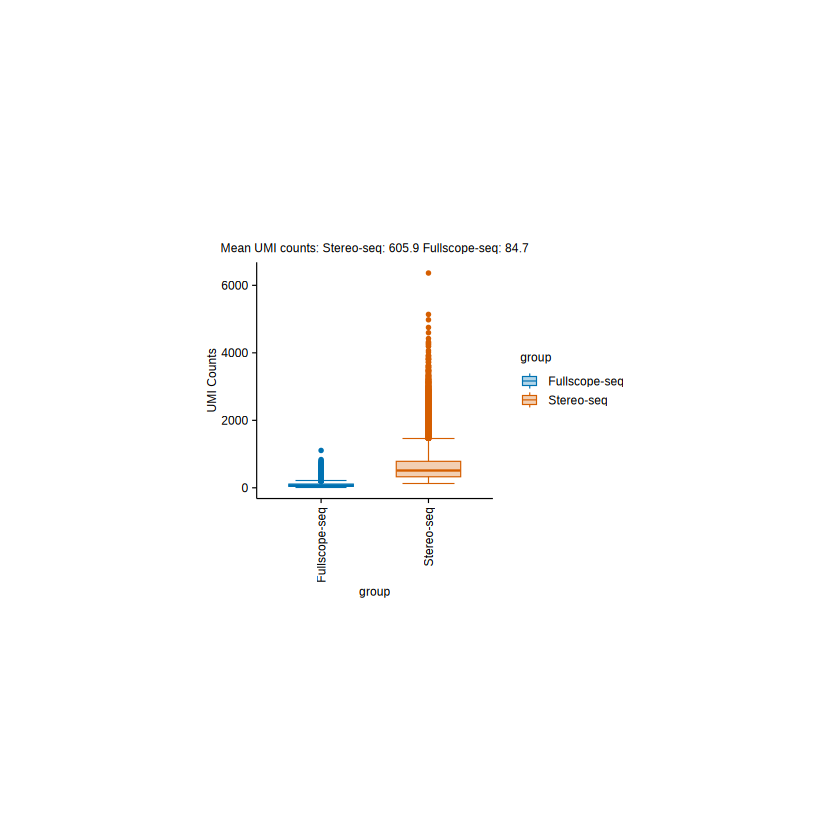

file saved to result/figure_revision/Single_cell_umi_count_stat_25_09_09.pdf

file saved to result/figure_revision/Single_cell_gene_count_stat_25_09_09.pdf



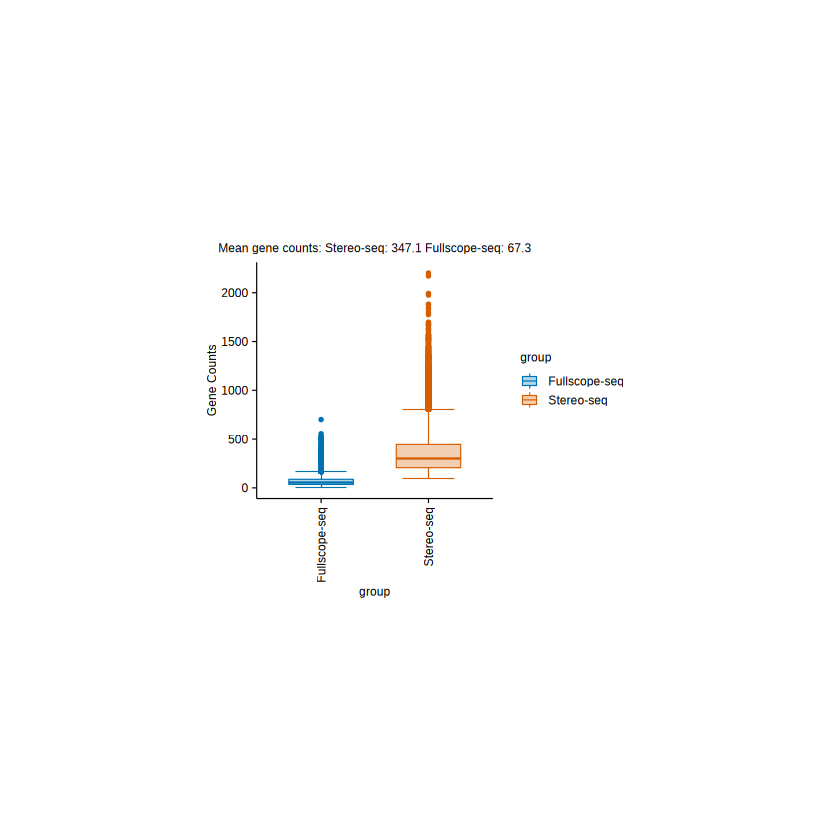

In [64]:
p1.0 = cmpcont |> 
  tidyplot(x = group, y = umicount, color = group) |> 
  add_boxplot(width = 0.5)  |> adjust_x_axis(rotate_labels = 90) |> 
  adjust_y_axis(title = "UMI Counts") |> add_title(text1)
p1.0
p1.1 = cmpcont |> 
  tidyplot(x = group, y = genecount, color = group) |> 
  add_boxplot(width = 0.5)  |> adjust_x_axis(rotate_labels = 90) |> 
  adjust_y_axis(title = "Gene Counts") |> add_title(text2)
p1.1
ggexport(p1.0,filename = "result/figure_revision/Single_cell_umi_count_stat_25_09_09.pdf",width = 5,height = 4)
ggexport(p1.1,filename = "result/figure_revision/Single_cell_gene_count_stat_25_09_09.pdf",width = 5,height = 4)

### UMI/Gene information stat

##### Bin 1 0.5um

In [29]:
ngscount.st = ngscount %>% group_by(umi_count) %>% summarise(n())
nrow(ngscount.st)

[1] 579

In [ ]:
nrow(fsraw)
length(unique(fsraw$transcript_id))
spot.st = fsraw %>% group_by(x,y) %>% summarise(genen = length(unique(gene_id)),
                                                transn = length(unique(transcript_id)),
                                               readn = length(unique(readid)))

In [30]:
flscount.st = spot.st %>% group_by(readn) %>% summarise(n())
flscount.st

readn,n()
<int>,<int>
1,51471018
2,13138753
3,3514598
4,1009851
5,319871
6,113960
7,45711
8,20918
9,10779


In [31]:
colnames(ngscount.st) = colnames(flscount.st) = c("UMIcount","frequence")
ngscount.st$umicount = as.character(ngscount.st$UMIcount)
ngscount.st[ngscount.st$UMIcount >= 10,]$umicount = ">=10"
ngscount.st$group = "Stereo-seq"

In [32]:
flscount.st$umicount = as.character(flscount.st$UMIcount)
flscount.st[flscount.st$UMIcount >= 10,]$umicount = ">=10"
flscount.st$group = "Fullscope-seq"
bin1cmp = rbind(ngscount.st,flscount.st)
write.csv(bin1cmp,file = "data/fullscope_qc/Bin1_umi_compare_25_09_08.csv",row.names = F, quote = F)
bin1cmp = bin1cmp %>% group_by(umicount,group) %>% summarise(frequence = sum(frequence))
bin1cmp

`summarise()` has grouped output by 'umicount'. You can override using the
`.groups` argument.


umicount,group,frequence
<chr>,<chr>,<int>
1,Fullscope-seq,51471018
1,Stereo-seq,438929386
2,Fullscope-seq,13138753
2,Stereo-seq,225570635
3,Fullscope-seq,3514598
3,Stereo-seq,132634494
4,Fullscope-seq,1009851
4,Stereo-seq,91768110
5,Fullscope-seq,319871


In [24]:
bin1cmp = read.csv("data/fullscope_qc/Bin1_umi_compare_25_09_08.csv")
bin1cmp %>% group_by(group) %>% summarise(sum(UMIcount*frequence)/sum(frequence))

group,sum(UMIcount * frequence)/sum(frequence)
<chr>,<dbl>
Fullscope-seq,1.370605
Stereo-seq,3.006794


file saved to ../figures/revision/Bin1_umi_stat_25_09_08.pdf



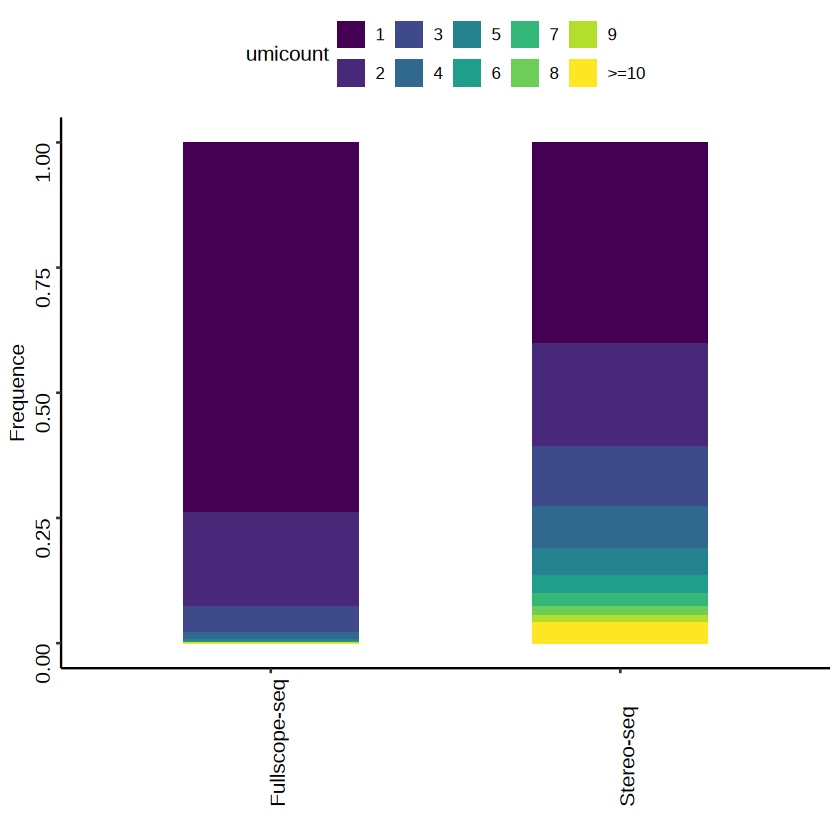

In [48]:
library(tidyplots)
bin1cmp$umicount = factor(bin1cmp$umicount,levels = c(as.character(1:9),">=10"))
p1 = ggplot(bin1cmp,aes(x = group,y = frequence,fill = umicount)) + 
    geom_bar(stat = "identity",position = "fill",width = 0.5) + 
    scale_fill_viridis(discrete = T) +
    theme_pubr() + xlab("") + ylab("Frequence") + 
    theme(axis.text = element_text(angle = 90,hjust = 0,vjust = 0.5))
p1
ggexport(p1,filename = "../figures/revision/Bin1_umi_stat_25_09_08.pdf",width = 2,height = 4)

#### bin 16

In [ ]:
#calculate mean UMIs
ra = 16
ngscount$x = as.numeric(MySplit(ngscount$CID,"_",1))
ngscount$y = as.numeric(MySplit(ngscount$CID,"_",2))
ngscount$xid = as.integer(ngscount$x/(ra*2)) * ra * 2 + ra
ngscount$yid = as.integer(ngscount$y/(ra*2)) * ra * 2 + ra
ngscount$blockid = paste0(ngscount$xid,"_",ngscount$yid)
ngscount.st = ngscount %>% group_by(blockid) %>% summarise(count = sum(umi_count))
head(ngscount.st)
qsave(ngscount.st,file = "data/fullscope_qc/ngs_t44_bin16_stat.qs")

In [ ]:
spot.st$xid = as.integer(spot.st$x/(ra*2)) * ra * 2 + ra
spot.st$yid = as.integer(spot.st$y/(ra*2)) * ra * 2 + ra
spot.st$blockid = paste0(spot.st$xid,"_",spot.st$yid)
flscount.st = spot.st %>% group_by(blockid) %>% summarise(count = sum(readn))
head(flscount.st)

In [11]:
cell.st = fsraw[!is.na(fsraw$cell_id),] %>% group_by(cell_id) %>% summarise(genen = length(unique(gene_id)),
                                                transn = length(unique(transcript_id)),
                                               readn = length(unique(readid)))
summary(spot.st$genen);summary(spot.st$transn);summary(spot.st$readn)
summary(cell.st$genen);summary(cell.st$transn);summary(cell.st$readn)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.167   1.000 983.000 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.000    1.000    1.000    2.002    2.000 2274.000 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.000    1.000    1.000    1.371    2.000 4438.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    35.0    56.0    67.3    88.0   700.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    63.0   104.0   125.8   167.0  1372.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   42.00   69.00   84.71  111.00 1107.00 

In [10]:
fsst = list("spotst" = spot.st,"cellst" = cell.st)
qsave(fsst,file = "data/fullscope_qc/fullscope_t44_data_count_stat.qs")

### Isoform detect sensitivity

In [29]:
install.packages("MCMCpack")

also installing the dependency ‘mcmc’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [ ]:

library(tidyverse)

GenerateData = function(n_reads,n_genes,n_isoforms,n_conditions,condition_names,myseed){

    set.seed(myseed) 
    isoforms_per_gene <- rpois(n_genes, lambda = 4)
    isoforms_per_gene[isoforms_per_gene < 1] <- 1 
    

    total_isoforms <- sum(isoforms_per_gene)
    
    diff <- n_isoforms - total_isoforms
    if (diff != 0) {
      adjustment_per_gene <- diff / n_genes
      isoforms_per_gene <- as.integer(pmax(1, isoforms_per_gene + adjustment_per_gene))
      current_total <- sum(isoforms_per_gene)
      residual_diff <- n_isoforms - current_total
      if (residual_diff != 0) {
        indices_to_adjust <- sample(1:n_genes, abs(residual_diff), replace = TRUE)
        for (idx in indices_to_adjust) {
          if (residual_diff > 0) {
            isoforms_per_gene[idx] <- isoforms_per_gene[idx] + 1
          } else {
            isoforms_per_gene[idx] <- max(1, isoforms_per_gene[idx] - 1)
          }
        }
      }
    }
    
    isoforms_per_gene <- as.integer(pmax(1, isoforms_per_gene)) 
    if (any(is.na(isoforms_per_gene))) {
      isoforms_per_gene[is.na(isoforms_per_gene)] <- 1 
      warning("NA values found in isoforms_per_gene and replaced with 1.")
    }
    
    gene_ids <- rep(1:n_genes, isoforms_per_gene)
    transcript_ids <- 1:sum(isoforms_per_gene)
    
    base_proportions <- unlist(lapply(isoforms_per_gene, function(n) {
      p <- rgamma(n, shape = 1, rate = 1)
      p / sum(p)
    }))

    set.seed(myseed+123)
    n_changing <- round(n_isoforms * 0.10)
    changing_transcripts <- sample(transcript_ids, n_changing)
    change_cond <- sample(1:n_conditions, n_changing, replace = TRUE)
    change_amount <- runif(n_changing, min = 0.1, max = 1)
    change_df = data.frame("transcript_id" = changing_transcripts,"effect" = change_amount)
    
    prop_matrix <- matrix(rep(base_proportions, each = n_conditions), 
                           nrow = n_isoforms, ncol = n_conditions, byrow = TRUE)
    
    for (i in 1:n_changing) {
      tid <- changing_transcripts[i]
      cond <- change_cond[i]
      gid <- gene_ids[tid]
      gene_isoforms <- which(gene_ids == gid)
      prop_matrix[tid, cond] <- prop_matrix[tid, cond] + change_amount[i]
      prop_matrix[gene_isoforms, cond] <- prop_matrix[gene_isoforms, cond] / sum(prop_matrix[gene_isoforms, cond])
    }

    chunk_size <- 100000
    n_chunks <- ceiling(n_reads / chunk_size)
    results_list <- vector("list", n_chunks)
    
    for (chunk in 1:n_chunks) {
      reads_in_chunk <- ifelse(chunk == n_chunks, n_reads - (chunk - 1) * chunk_size, chunk_size) 
      reads_per_condition <- as.vector(rmultinom(1, reads_in_chunk, rep(1/n_conditions, n_conditions)))
  
      chunk_dfs <- list()
      for (cond in 1:n_conditions) {
        n_reads_this_cond <- reads_per_condition[cond]
        if (n_reads_this_cond > 0) {
          sampled_transcripts <- sample(
            x = transcript_ids,
            size = n_reads_this_cond,
            replace = TRUE,
            prob = prop_matrix[, cond] 
          )
          
          cond_df <- data.frame(
            read_id = NA,
            condition = factor(condition_names[cond], levels = condition_names),
            gene_id = gene_ids[sampled_transcripts],
            transcript_id = sampled_transcripts,
            stringsAsFactors = FALSE
          )
          chunk_dfs[[cond]] <- cond_df
        }
      }
  
      chunk_df <- bind_rows(chunk_dfs)
      start_id <- (chunk - 1) * chunk_size + 1
      chunk_df$read_id <- start_id:(start_id + nrow(chunk_df) - 1)
      
      chunk_df <- chunk_df[sample(nrow(chunk_df)), ]
      results_list[[chunk]] <- chunk_df
    }
    final_df <- bind_rows(results_list)
    rm(results_list)
    gc()
    
    return(list("readdf" = final_df, "changedf" = change_df))
}
CalSigIsoform <- function(readdfi,drt = 0.1){
    transt <- readdfi %>%
      #filter(abs(dr) > 0.1) %>%
      group_by(condition, gene_id, transcript_id) %>%
      summarise(
        count = n()
      ) %>%
      group_by(condition, gene_id) %>%
      mutate(
          genecount = sum(count),
        relative = count/genecount
      )
    colnames(transt)[1] = "areatr"
    transt <- transt[!is.na(transt$areatr), ]
    transt <- transt[transt$areatr != "", ]
    
    transt$relative <- transt$count / transt$genecount
    transtf <- transt %>% 
      group_by(transcript_id) %>% 
      filter(mean(relative) > 0.05) %>%
      ungroup()
    
    transtf <- transtf %>% 
      group_by(transcript_id) %>% 
      filter(n_distinct(areatr) > 1) %>%
      group_by(gene_id) %>% 
      filter(n_distinct(transcript_id) > 1) %>%
      ungroup()
    
    if(nrow(transtf) == 0) {
      return(data.frame())
    }
    
    transtf <- transtf %>% 
      group_by(transcript_id) %>%
      mutate(
        otherrelative = (sum(relative) - relative) / (n() - 1)
      ) %>%
      ungroup()
    
    transtf$dr <- transtf$relative - transtf$otherrelative 

    MyChiqTest <- function(count_df) {
      cont_tab <- matrix(count_df$count, nrow = n_distinct(count_df$areatr), byrow = FALSE)
      if(any(rowSums(cont_tab) == 0) || any(colSums(cont_tab) == 0)) {
        return(NA)
      }
      p_val <- tryCatch(
        chisq.test(cont_tab)$p.value,
        error = function(e) NA
      )
      return(p_val)
    }
    
    pvdf <- transtf %>%
      group_by(gene_id) %>%
      summarise(pvalue = MyChiqTest(data.frame(areatr, transcript_id, count)))
    
    pvdf$padj <- p.adjust(pvdf$pvalue, method = "BH") 
    
    transtf <- merge(transtf, pvdf, by = "gene_id", all.x = TRUE)
 
    transtf$sig <- "N"
    transtf$sig[transtf$dr > drt & transtf$padj < 0.05] <- "Up"
    transtf$sig[transtf$dr < -drt & transtf$padj < 0.05] <- "Down"
    
    return(transtf)
}
CalAUC = function(dtu_results,changedfi){
    dtu_results$true_change = FALSE
    dtu_results[dtu_results$transcript_id %in% changedfi$transcript_id,]$true_change = TRUE
    dtu_results$mysig = FALSE
    detect_trans = unique(dtu_results[dtu_results$sig != "N",]$transcript_id)
    if(nrow(dtu_results[dtu_results$transcript_id %in% detect_trans,]) > 0){
        dtu_results[dtu_results$transcript_id %in% detect_trans,]$mysig = TRUE
    }
    simulation_results = unique(dtu_results[,c("transcript_id","mysig","true_change")])
    #auc = nrow(simulation_results[simulation_results$true_change == simulation_results$mysig,])/nrow(simulation_results)
    simi = simulation_results
    FP = nrow(simi[simi$true_change == FALSE & simi$mysig == TRUE,])
    TN = nrow(simi[simi$true_change == FALSE & simi$mysig == FALSE,])
    TP = nrow(simi[simi$true_change == TRUE & simi$mysig == TRUE,])
    FN = nrow(simi[simi$true_change == TRUE & simi$mysig == FALSE,])
    FPR = FP/(FP + TN)
    TPR = TP/(TP + FN)
    resdf = rbind(resdf,data.frame("FPR" = FPR,"TPR" = TPR))
   
    return(resdf)
}

Simudf = function(seedi){
    set.seed(seedi)
    n_reads <- c(100000000,50000000,10000000,5000000,1000000,500000,100000,50000,10000) 
    n_genes <- 1000 
    n_isoforms <- 4000 
    n_conditions <- c(6,10,15,20,25,30) 
    drt = c(0.1,0.2,0.3,0.4,0.5)
    resdf = NULL
    for(i in 1:length(n_reads)){
        for(k in 1:length(n_conditions)){
            condition_names <- paste0("Condition_", 1:n_conditions[k]) 
            gtdfls = GenerateData(n_reads[i],n_genes,n_isoforms,n_conditions[k],condition_names,seedi)
            readdfi = gtdfls$readdf
            changedfi = gtdfls$changedf
            for(j in 1:length(drt)){
                dtu_results = CalSigIsoform(readdfi,drt[j])
                aucres = CalAUC(dtu_results,changedfi)
                aucres$nread = n_reads[i]
                aucres$n_genes = n_genes
                aucres$n_isoforms = n_isoforms
                aucres$n_conditions = n_conditions[k]
                aucres$drt = drt[j]
                resdf = rbind(resdf,aucres)
            }
        }
    }
    resdf$simid = seedi
    return(resdf)
}



In [96]:
simtime = 10
resdf = NULL
for(i in 1:simtime){
    resdfi = Simudf(i)
    resdf = rbind(resdf,resdfi)
}
head(resdf)
write.csv(resdf,file = "result/figure_revision/isoform_sensitive_simu.csv",quote = F, row.names = F)

`summarise()` has grouped output by 'condition', 'gene_id'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'condition', 'gene_id'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'condition', 'gene_id'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'condition', 'gene_id'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'condition', 'gene_id'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'condition', 'gene_id'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'condition', 'gene_id'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'condition', 'gene_id'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'condition', 'gene_id'. You can override
using the `.groups` argument.
`summarise()` has grouped output by '

ERROR: Error in rbind(deparse.level, ...): numbers of columns of arguments do not match


In [ ]:
library(tidyplots)
rgb(35,141,200,maxColorValue = 255)
resdf$mgene = log10(resdf$nread/resdf$n_genes)
resdf$mgene = as.factor(round(resdf$mgene,1))
xlabel = unique(as.character(resdf$nread/resdf$n_genes))
names(xlabel) = unique(resdf$mgene)
resdfm = resdf %>% group_by(mgene,n_conditions,drt,nread,n_genes) %>% 
                summarise("TPR" = mean(TPR),"FPR" = mean(FPR))
resdfl <- tidyr::pivot_longer(resdfm,
                              cols = c("TPR", "FPR"), 
                              names_to = "type",     
                              values_to = "Value"      
)
resdfl

[1] "#238DC8"

`summarise()` has grouped output by 'mgene', 'n_conditions', 'drt', 'nread'.
You can override using the `.groups` argument.


mgene,n_conditions,drt,nread,n_genes,type,Value
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,6,0.1,10000,1000,TPR,0
1,6,0.1,10000,1000,FPR,0
1,6,0.2,10000,1000,TPR,0
1,6,0.2,10000,1000,FPR,0
1,6,0.3,10000,1000,TPR,0
1,6,0.3,10000,1000,FPR,0
1,6,0.4,10000,1000,TPR,0
1,6,0.4,10000,1000,FPR,0
1,6,0.5,10000,1000,TPR,0


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
file saved to result/figure_revision/isoform_sensitive_simu_AUC.pdf



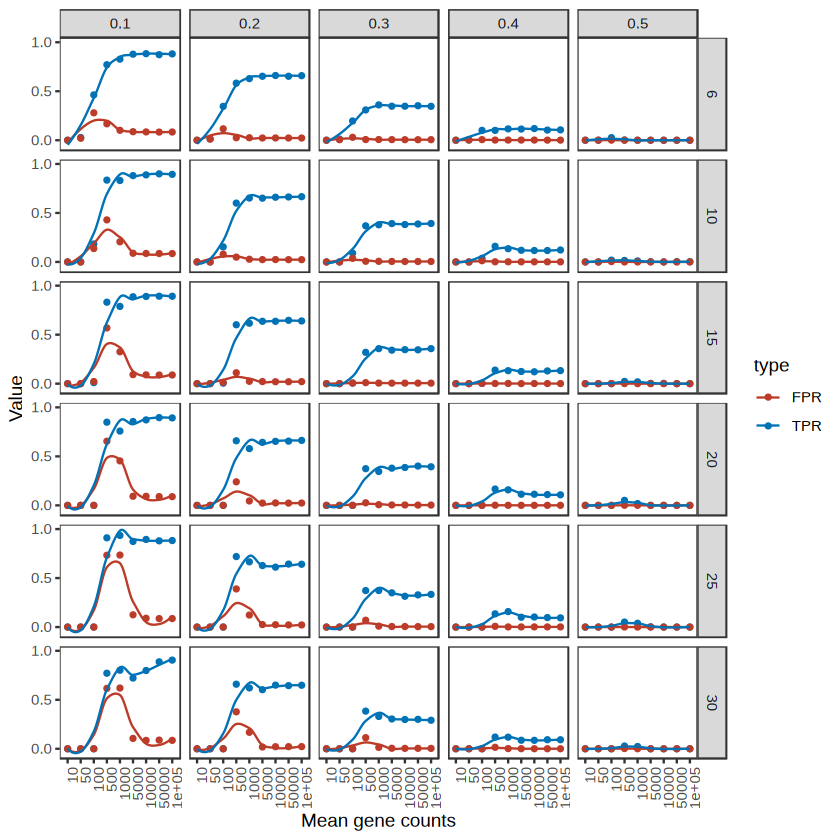

In [99]:



p1.1 = ggplot(resdfl,aes(x = mgene,y = Value,color = type)) + 
            geom_point(size = 1) + 
            geom_smooth(aes(group = type),method = "loess", se = FALSE,linewidth = 0.5) + 
            scale_color_nejm() +
            facet_grid(n_conditions~drt) +
            scale_x_discrete(labels = xlabel) + 
            scale_y_continuous(breaks = c(0,0.5,1)) + 
            theme_bw() +
            theme(axis.text.x = element_text(angle = 90, hjust = 1),
                  panel.grid.major = element_blank(),panel.grid.minor = element_blank()) + 
            xlab("Mean gene counts")
p1.1
# p1.2 = ggplot(resdf,aes(x = mgene,y = FPR)) + 
#             geom_boxplot(color = "#238DC8",box.linewidth = 0.5) + 
#             facet_grid(change~drt) +
#             scale_x_discrete(labels = xlabel) + 
#             scale_y_continuous(breaks = c(0,0.5,1),limi) + 
#             theme_bw() +
#             theme(axis.text.x = element_text(angle = 90, hjust = 1),
#                  panel.grid.major = element_blank(),panel.grid.minor = element_blank()) + xlab("Mean gene counts")

ggexport(p1.1,filename = "result/figure_revision/isoform_sensitive_simu_AUC.pdf",width = 6,height = 5)
#ggexport(p1.2,filename = "result/figure_revision/isoform_sensitive_simu_FPR.pdf",width = 6,height = 8)
#p1.1
#p1.2

In [ ]:
### isoform diversity detect simulation
Simuisodiv = function(seedi){
    set.seed(seedi)
    n_reads <- c(100000000,50000000,10000000,5000000,1000000,500000,100000,50000,10000) 
    n_genes <- 1000 
    n_isoforms <- 4000 
    n_conditions <- 6 
    condition_names <- paste0("Condition_", 1:n_conditions)
    resdf = NULL
    gtdfls = GenerateData(n_reads[i],n_genes,n_isoforms,n_conditions,condition_names,seedi)
    readdfi = gtdfls$readdf
    resdf$simid = seedi
    return(resdf)
}


In [ ]:
n_reads <- c(100000000,50000000,10000000,5000000,1000000,500000,100000,50000,40000,30000,20000,10000,5000) #
n_genes <- 1000
n_isoforms <- 4000 
n_conditions <- 6 
condition_names <- paste0("Condition_", 1:n_conditions)
simtime = 10
isodiv = NULL

for(i in 1:simtime){
    for(j in 1:length(n_reads)){
        gtdfls = GenerateData(n_reads[j],n_genes,n_isoforms,n_conditions,condition_names,i)
        readdfi = gtdfls$readdf
        transnum = length(unique(readdfi$transcript_id))
        isodivi = data.frame("simi" = i,
                             "transnum" = transnum,
                            "transprop" = transnum/n_isoforms)
        isodivi$nread = n_reads[j]
        isodivi$n_genes = n_genes
        isodivi$n_isoforms = n_isoforms
        isodivi$n_conditions = n_conditions
        isodiv = rbind(isodiv,isodivi)
    }
}
write.csv(isodiv,file = "result/figure_revision/isoform_diversity_simu.csv",quote = F, row.names = F)


file saved to result/figure_revision/isoform_diversity_detected_simu_mean4.pdf



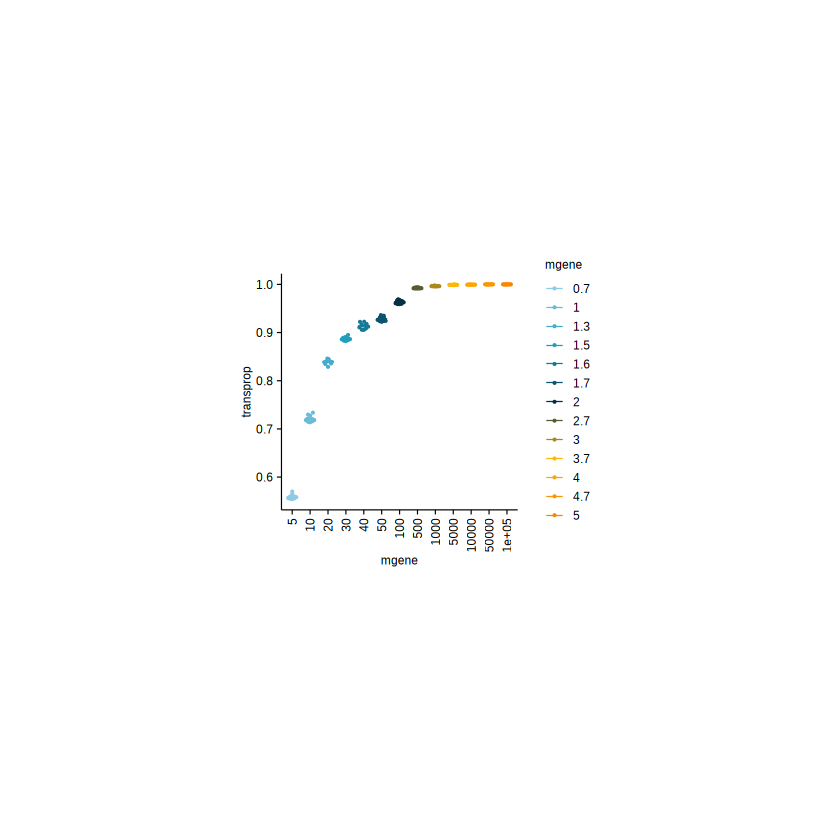

In [92]:
# isodivm = isodiv %>% group_by(n_genes,nread) %>% 
#                 summarise("transprop" = mean(transprop))
isodiv$mgene = log10(isodiv$nread/isodiv$n_genes)
isodiv$mgene = as.factor(round(isodiv$mgene,1))
xlabel = unique(as.character(isodiv$nread/isodiv$n_genes))
names(xlabel) = unique(isodiv$mgene)
#isodiv

p1.2 = isodiv |> 
  tidyplot(x = mgene, y = transprop,color = mgene) |> 
  add_mean_dash() |> 
  add_sem_errorbar() |> 
  add_data_points_beeswarm(size = 0.1) |> 
  adjust_x_axis(labels = xlabel,rotate_labels = 90) |>
  adjust_colors(new_colors = colors_discrete_seaside)
p1.2
ggexport(p1.2,filename = "result/figure_revision/isoform_diversity_detected_simu_mean4.pdf",width = 4,height = 3)
